In [1]:
import sqlite3


# 建立 SQLite 資料庫連線
conn = sqlite3.connect('test.db')


# 建立一個名為 students 的資料表
conn.execute('''CREATE TABLE students
             (ID INT PRIMARY KEY NOT NULL,
             NAME TEXT NOT NULL,
             AGE INT NOT NULL,
             GRADE INT NOT NULL);''')


# 插入一些資料
conn.execute("INSERT INTO students (ID, NAME, AGE, GRADE) \
              VALUES (1, 'John', 20, 85)")
conn.execute("INSERT INTO students (ID, NAME, AGE, GRADE) \
              VALUES (2, 'Mary', 21, 90)")
conn.execute("INSERT INTO students (ID, NAME, AGE, GRADE) \
              VALUES (3, 'Tom', 19, 78)")
conn.execute("INSERT INTO students (ID, NAME, AGE, GRADE) \
              VALUES (4, 'Lily', 22, 95)")


# 提交更改
conn.commit()


# 關閉資料庫連線
conn.close()

In [2]:
import pandas as pd
import sqlite3

# 建立 SQLite 資料庫連線
conn = sqlite3.connect('test.db')

# 讀取資料表資料
df = pd.read_sql_query("SELECT * from students", conn)

# 關閉資料庫連線
conn.close()

# 顯示 DataFrame
print(df)

   ID  NAME  AGE  GRADE
0   1  John   20     85
1   2  Mary   21     90
2   3   Tom   19     78
3   4  Lily   22     95


In [3]:
# 建立 SQLite 資料庫連線
conn = sqlite3.connect('test.db')

# 將 DataFrame 的資料寫入資料庫
df.to_sql('students_new', conn, if_exists='replace', index=False)

# 關閉資料庫連線
conn.close()

In [12]:
df

,ID,NAME,AGE,GRADE
0,1,John,20,85
1,2,Mary,21,90
2,3,Tom,19,78
3,4,Lily,22,95


In [15]:
df.iloc[0:1]

,ID,NAME,AGE,GRADE
0,1,John,20,85


In [16]:
df.loc[0:1]

,ID,NAME,AGE,GRADE
0,1,John,20,85
1,2,Mary,21,90


In [18]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime
import sqlite3

r = requests.get('https://rate.bot.com.tw/xrt?Lang=zh-TW')
response = r.text
soup = BeautifulSoup(response)

# 找到匯率表格(attrs為搜尋)
table = soup.find('table', attrs={'title': "牌告匯率"}).find('tbody')
data = []

In [20]:
table

<tbody>
<tr>
<td class="currency phone-small-font" data-table="幣別">
<div>
<div class="sp-div sp-america-div">
<img alt="美金" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
</div>
<br class="visible-phone print_hide"/>
<div class="visible-phone print_hide">
                                美金 (USD)
                            </div>
<div class="hidden-phone print_show xrt-cur-indent">
                                美金 (USD)
                            </div>
</div>
</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金買入">32.01</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">32.68</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">
                        32.335
                    </td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">
                        32.485
                    </td>
<td class="text-center 

In [21]:
# 找到每一個row的資料，並移除空白
rows = table.find_all('tr')
for row in rows:
    currency = row.find('div', class_='visible-phone').text.strip()
    buy = row.find('td', attrs={'data-table': '本行現金買入'}).text.strip()
    sell = row.find('td', attrs={'data-table': '本行現金賣出'}).text.strip()
    instant_buy = row.find('td', attrs={'data-table': '本行即期買入'}).text.strip()
    instant_sell = row.find('td', attrs={'data-table': '本行即期賣出'}).text.strip()
    update_time = soup.find('span', class_='time').text.strip()
    data.append([currency, buy, sell, instant_buy, instant_sell, update_time])

In [23]:
rows

[<tr>
 <td class="currency phone-small-font" data-table="幣別">
 <div>
 <div class="sp-div sp-america-div">
 <img alt="美金" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
 </div>
 <br class="visible-phone print_hide"/>
 <div class="visible-phone print_hide">
                                 美金 (USD)
                             </div>
 <div class="hidden-phone print_show xrt-cur-indent">
                                 美金 (USD)
                             </div>
 </div>
 </td>
 <td class="rate-content-cash text-right print_hide" data-table="本行現金買入">32.01</td>
 <td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">32.68</td>
 <td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">
                         32.335
                     </td>
 <td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">
                         32.485
                     </td>
 <td cla

In [22]:
data

[['美金 (USD)', '32.01', '32.68', '32.335', '32.485', '2024/05/11 09:25'],
 ['港幣 (HKD)', '3.993', '4.197', '4.114', '4.184', '2024/05/11 09:25'],
 ['英鎊 (GBP)', '39.4', '41.52', '40.295', '40.925', '2024/05/11 09:25'],
 ['澳幣 (AUD)', '21.01', '21.79', '21.225', '21.57', '2024/05/11 09:25'],
 ['加拿大幣 (CAD)', '23.22', '24.13', '23.55', '23.88', '2024/05/11 09:25'],
 ['新加坡幣 (SGD)', '23.36', '24.27', '23.83', '24.05', '2024/05/11 09:25'],
 ['瑞士法郎 (CHF)', '34.95', '36.15', '35.56', '35.95', '2024/05/11 09:25'],
 ['日圓 (JPY)', '0.199', '0.2118', '0.2058', '0.2108', '2024/05/11 09:25'],
 ['南非幣 (ZAR)', '-', '-', '1.712', '1.802', '2024/05/11 09:25'],
 ['瑞典幣 (SEK)', '2.6', '3.12', '2.93', '3.05', '2024/05/11 09:25'],
 ['紐元 (NZD)', '19.04', '19.89', '19.37', '19.67', '2024/05/11 09:25'],
 ['泰幣 (THB)', '0.7541', '0.9441', '0.8635', '0.9095', '2024/05/11 09:25'],
 ['菲國比索 (PHP)', '0.4982', '0.6302', '-', '-', '2024/05/11 09:25'],
 ['印尼幣 (IDR)', '0.00168', '0.00238', '-', '-', '2024/05/11 09:25'],
 ['歐元 (

In [31]:
import pandas as pd

data = pd.DataFrame({
    'col1': [1, 2, 3, 4],
    'col2': [5, 6, 7, 8],
    'col3': [9, 10, 11, 12]
})

# 選擇第一列資料
row = data.loc[0]

# 選擇第一列和第二列資料
rows = data.loc[[0, 1]]

# 選擇第一列和第二列，以及第一欄和第二欄的資料
subset = data.loc[[0, 1], ['col1', 'col2']]


# 選擇第一列和第二列，以及第一欄和第二欄的資料
subset2 = data.loc[0:1,['col1', 'col2']]

# 選擇第一列和第二列，以及第一欄和第二欄的資料
subset3 = data.iloc[0:2,0:2]

In [32]:
subset2

,col1,col2
0,1,5
1,2,6


In [33]:
subset3

,col1,col2
0,1,5
1,2,6


In [2]:
row

col1    1
col2    5
col3    9
Name: 0, dtype: int64

In [3]:
rows

,col1,col2,col3
0,1,5,9
1,2,6,10


In [4]:
subset

,col1,col2
0,1,5
1,2,6


In [34]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'col1': [5, 12, 8, np.nan],
    'col2': [16, 9, np.nan, 4],
    'col3': [11, 3, 7, 20]
})

# 檢查缺失值
data.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,True,False
3,True,False,False


In [35]:
data.notnull()

,col1,col2,col3
0,True,True,True
1,True,True,True
2,True,False,True
3,False,True,True


In [36]:
data.notna()

,col1,col2,col3
0,True,True,True
1,True,True,True
2,True,False,True
3,False,True,True


In [40]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'col1': [5, 12, np.nan, np.nan],
    'col2': [16, 9, np.nan, 4],
    'col3': [11, 3, 7, 20]
})

In [41]:
data

,col1,col2,col3
0,5.0,16.0,11
1,12.0,9.0,3
2,NaN,NaN,7
3,NaN,4.0,20


In [39]:
# 刪除所有含有缺失值的觀測值（列）
data.dropna()

,col1,col2,col3
0,5.0,16.0,11
1,12.0,9.0,3


In [42]:
# 刪除含有缺失值大於一定數量的觀測值（列）
data.dropna(thresh=2) # 因為第二筆資料的 np.nan 數量大於 thresh=2，則會被刪除

,col1,col2,col3
0,5.0,16.0,11
1,12.0,9.0,3
3,NaN,4.0,20


In [43]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'col1': [5, 12, np.nan, np.nan],
    'col2': [16, 9, np.nan, 4],
    'col3': [11, 3, 7, 20]
})

# 删除包含缺失值的整列
data.dropna(axis=1, inplace=True)

In [44]:
data

,col3
0,11
1,3
2,7
3,20


In [47]:
import pandas as pd

data = pd.DataFrame({
    'col1': [5, 12, 8, np.nan],
    'col2': [16, 9, np.nan, 4],
    'col3': [11, 3, 7, 20]
})
data

,col1,col2,col3
0,5.0,16.0,11
1,12.0,9.0,3
2,8.0,NaN,7
3,NaN,4.0,20


In [48]:

# 使用插值法填充缺失值
data.interpolate()

,col1,col2,col3
0,5.0,16.0,11
1,12.0,9.0,3
2,8.0,6.5,7
3,8.0,4.0,20


In [49]:
import pandas as pd
from sklearn.impute import KNNImputer

data = pd.DataFrame({
    'col1': [5, 12, 8, np.nan],
    'col2': [16, 9, np.nan, 4],
    'col3': [11, 3, 7, 20]
})

# 使用 KNN 算法填充缺失值
imputer = KNNImputer(n_neighbors=2)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [50]:
data

,col1,col2,col3
0,5.0,16.0,11
1,12.0,9.0,3
2,8.0,NaN,7
3,NaN,4.0,20


In [51]:
data_imputed

,col1,col2,col3
0,5.0,16.0,11.0
1,12.0,9.0,3.0
2,8.0,12.5,7.0
3,8.5,4.0,20.0


In [52]:
import pandas as pd

# 建立一個字典，包含各欄位的資料
data_dict = {'col1': [1, 2, 3, 4],
             'col2': ['A', 'B', 'C', 'D'],
             'col3': [0.1, 0.2, 0.3, 0.4]}

# 使用字典建立一個 dataframe
data = pd.DataFrame(data_dict)

# 查詢每個欄位的類型
print(data.dtypes)

col1      int64
col2     object
col3    float64
dtype: object


In [53]:
import pandas as pd

# 創建一個包含類別欄位的 dataframe
df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'category': ['A', 'B', 'C', 'A', 'B']
})

print(df)

   id category
0   1        A
1   2        B
2   3        C
3   4        A
4   5        B


In [54]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['category_labelencoded'] = label_encoder.fit_transform(df['category'])

print(df)

   id category  category_labelencoded
0   1        A                      0
1   2        B                      1
2   3        C                      2
3   4        A                      0
4   5        B                      1


In [57]:

# 使用 One-hot-encoding 將類別欄位轉換為數值欄位
df_onehotencoded = pd.get_dummies(df, columns=['category'])

print(df_onehotencoded)

   id  category_labelencoded  category_A  category_B  category_C
0   1                      0           1           0           0
1   2                      1           0           1           0
2   3                      2           0           0           1
3   4                      0           1           0           0
4   5                      1           0           1           0


In [4]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two'],
                   'C' : [1, 5, 5, 2, 5, 5],
                   'D' : [2.0, 5., 8., 1., 2., 9.]})
df

,A,B,C,D
0,foo,one,1,2.0
1,bar,one,5,5.0
2,foo,two,5,8.0
3,bar,three,2,1.0
4,foo,two,5,2.0
5,bar,two,5,9.0


In [7]:
df.groupby('A')[['C', 'D']].mean()

,C,D
A,,
bar,4.000000,5.0
foo,3.666667,4.0


In [8]:
df.groupby('A')[['C', 'D']].transform(lambda x: x.max() - x.min())

,C,D
0,4.0,6.0
1,3.0,8.0
2,4.0,6.0
3,3.0,8.0
4,4.0,6.0
5,3.0,8.0


In [11]:
lambda x: x.max() - x.min()

<function __main__.<lambda>(x)>

In [12]:
df.groupby('A')[['C', 'D']].transform("mean")

,C,D
0,3.666667,4.0
1,4.000000,5.0
2,3.666667,4.0
3,4.000000,5.0
4,3.666667,4.0
5,4.000000,5.0


In [13]:
#create DataFrame
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'points': [30, 22, 19, 14, 14, 11, 20, 28]})

#view DataFrame
print(df)

  team  points
0    A      30
1    A      22
2    A      19
3    A      14
4    B      14
5    B      11
6    B      20
7    B      28


In [14]:
#create new column called mean_points
df['mean_points'] = df.groupby('team')['points'].transform('mean')

#view updated DataFrame
print(df)


  team  points  mean_points
0    A      30        21.25
1    A      22        21.25
2    A      19        21.25
3    A      14        21.25
4    B      14        18.25
5    B      11        18.25
6    B      20        18.25
7    B      28        18.25


In [18]:
df['percent_of_points'] = df.groupby('team')['points'].transform(lambda x: x/x.sum())
df

,team,points,mean_points,mean_points2,percent_of_points
0,A,30,21.25,NaN,0.352941
1,A,22,21.25,NaN,0.258824
2,A,19,21.25,NaN,0.223529
3,A,14,21.25,NaN,0.164706
4,B,14,18.25,NaN,0.191781
5,B,11,18.25,NaN,0.150685
6,B,20,18.25,NaN,0.273973
7,B,28,18.25,NaN,0.383562


In [24]:
df['mean_points2'] = df.groupby('team')['points'].transform(lambda x: x.fillna(x.mean()))

In [25]:
df

,team,points,mean_points,mean_points2,percent_of_points
0,A,30,21.25,30,0.352941
1,A,22,21.25,22,0.258824
2,A,19,21.25,19,0.223529
3,A,14,21.25,14,0.164706
4,B,14,18.25,14,0.191781
5,B,11,18.25,11,0.150685
6,B,20,18.25,20,0.273973
7,B,28,18.25,28,0.383562


In [26]:
import numpy as np
df['mean_points2'] = np.nan
df

,team,points,mean_points,mean_points2,percent_of_points
0,A,30,21.25,NaN,0.352941
1,A,22,21.25,NaN,0.258824
2,A,19,21.25,NaN,0.223529
3,A,14,21.25,NaN,0.164706
4,B,14,18.25,NaN,0.191781
5,B,11,18.25,NaN,0.150685
6,B,20,18.25,NaN,0.273973
7,B,28,18.25,NaN,0.383562


In [34]:
df['points'][2:4] = np.nan

C:\Users\User\AppData\Local\Temp\ipykernel_4800\67940146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points'][2:4] = np.nan


In [35]:
df

,team,points,mean_points,mean_points2,percent_of_points
0,A,30.0,21.25,NaN,0.352941
1,A,22.0,21.25,NaN,0.258824
2,A,NaN,21.25,NaN,0.223529
3,A,NaN,21.25,NaN,0.164706
4,B,14.0,18.25,NaN,0.191781
5,B,11.0,18.25,NaN,0.150685
6,B,20.0,18.25,NaN,0.273973
7,B,28.0,18.25,NaN,0.383562


In [36]:
df['points'] = df.groupby('team')['points'].transform(lambda x: x.fillna(x.mean()))
df

,team,points,mean_points,mean_points2,percent_of_points
0,A,30.0,21.25,NaN,0.352941
1,A,22.0,21.25,NaN,0.258824
2,A,26.0,21.25,NaN,0.223529
3,A,26.0,21.25,NaN,0.164706
4,B,14.0,18.25,NaN,0.191781
5,B,11.0,18.25,NaN,0.150685
6,B,20.0,18.25,NaN,0.273973
7,B,28.0,18.25,NaN,0.383562


In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


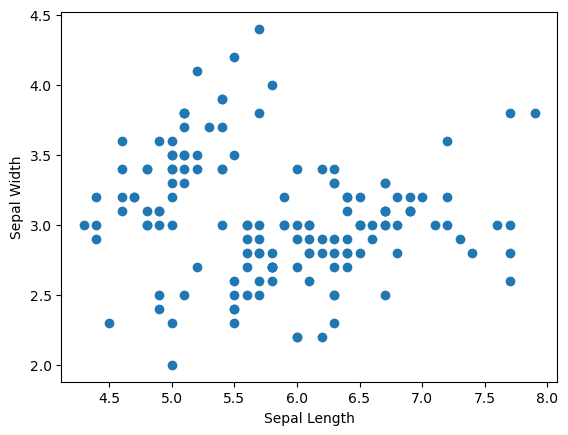

In [2]:
import matplotlib.pyplot as plt

plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

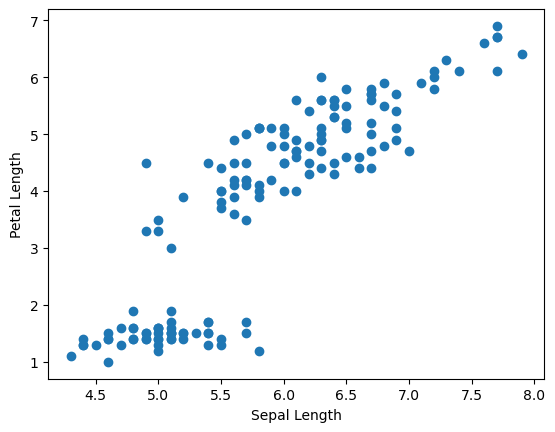

In [3]:
plt.scatter(iris['sepal_length'], iris['petal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

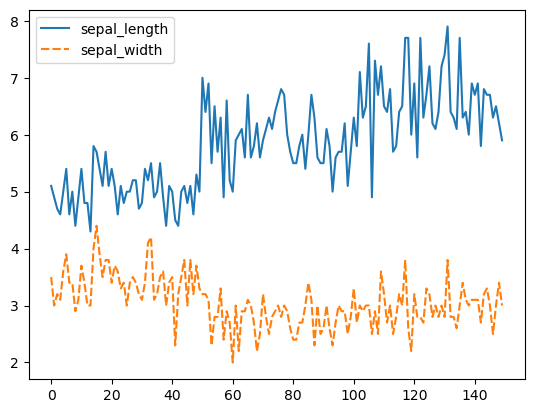

In [8]:
sns.lineplot(data=iris[['sepal_length', 'sepal_width']])
plt.show()

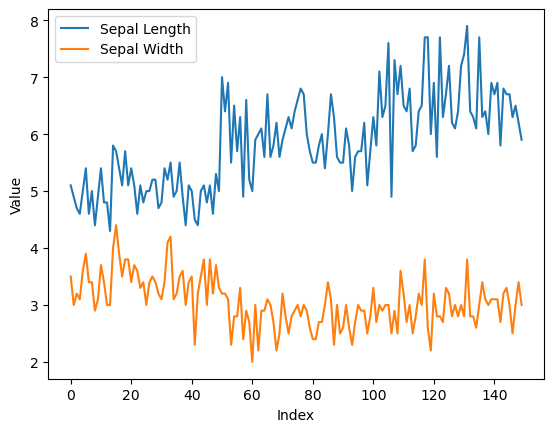

In [4]:
plt.plot(iris['sepal_length'], label='Sepal Length')
plt.plot(iris['sepal_width'], label='Sepal Width')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

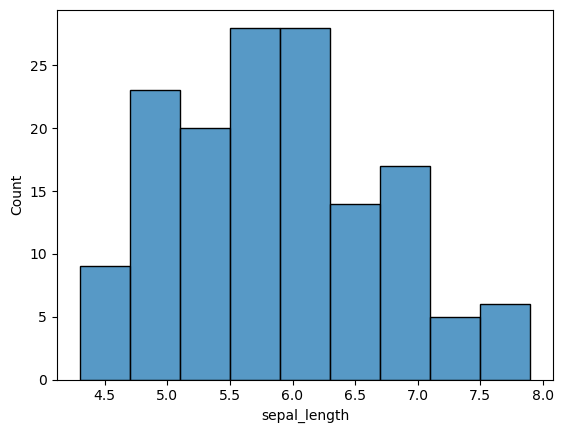

In [9]:
sns.histplot(data=iris, x='sepal_length')
plt.show()

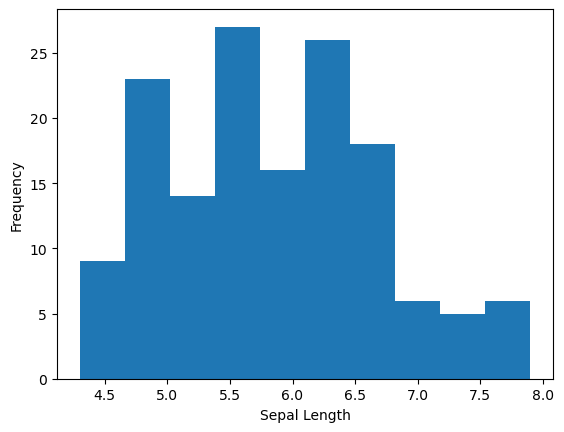

In [5]:
plt.hist(iris['sepal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

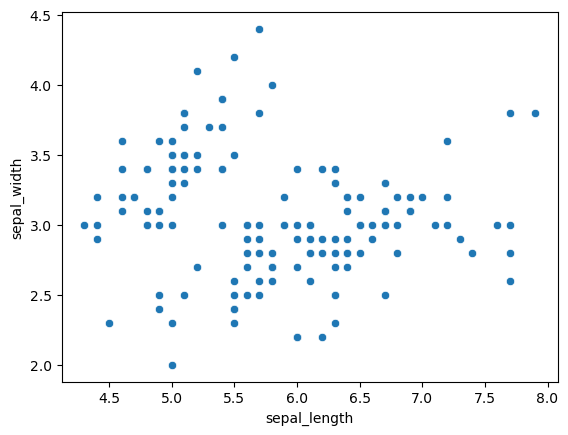

In [6]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)
plt.show()

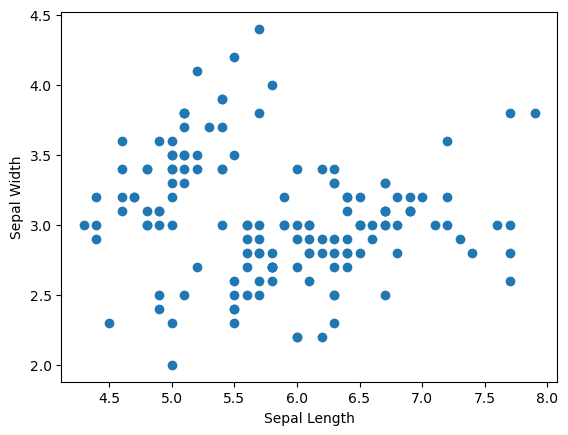

In [7]:
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [10]:
import numpy as np

# 創建一個隨機數組
data = np.random.randn(100)

# 計算每個數據點的 Z 分數
z_scores = (data - np.mean(data)) / np.std(data)

# 設置閾值
threshold = 3

# 找到所有 Z 分數大於閾值的數據點
outliers = np.where(np.abs(z_scores) > threshold)[0]

print(outliers)

[66]


In [14]:
z_scores#[66]

array([-0.77982737, -0.49605021, -0.9998297 , -0.98891115,  0.01354144,
        0.34666285, -0.73278474, -2.34405516,  1.04628094, -1.2842534 ,
        0.42582748,  0.39916774,  1.48296865,  2.11892054,  1.52970203,
       -0.35738062, -0.41969293,  0.56915237, -1.53288119,  1.28795517,
       -0.01927185,  0.1863706 , -0.47264184,  0.09192359, -0.04499273,
       -1.26408794,  1.10330198, -1.2654647 ,  0.83171984,  0.39088375,
        0.59198601,  0.80732981,  1.20594104, -1.52126956,  1.15595261,
        1.32144848, -0.35420606,  0.58316955,  0.16311842, -0.63910082,
       -1.29859441, -0.29182774, -0.87309163, -1.54203026, -0.34157843,
       -0.71712038, -0.44559982, -0.66838456,  1.50510526,  0.61664996,
       -0.4106165 , -0.60309427,  1.27254929,  0.42184293, -0.69501938,
        1.95441643, -1.51315987, -0.31018546,  0.25201219, -0.04629817,
       -1.00601637,  0.23891825,  0.19126473,  0.77335078, -0.45501152,
        1.23137545,  3.59390853, -2.09205975,  0.66679995, -1.08

In [16]:
import pandas as pd

# 創建一個包含5個數字的 DataFrame
df = pd.DataFrame({'numbers': [1, 7, 15, 23, 33]})

# 使用 cut 函數劃分為2個等寬區間
df['bins'] = pd.cut(df['numbers'], bins=2)

# 查看結果
print(df)

   numbers           bins
0        1  (0.968, 17.0]
1        7  (0.968, 17.0]
2       15  (0.968, 17.0]
3       23   (17.0, 33.0]
4       33   (17.0, 33.0]


In [18]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32, 101]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (60.0, 100.0], (35.0, 60.0], (35.0, 60.0], (25.0, 35.0], NaN]
Length: 13
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [19]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult', NaN]
Length: 13
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [20]:
import pandas as pd

# 創建一個包含 Missing Value 的 DataFrame
df = pd.DataFrame({'Age': [22, 38, 26, 35, 35, np.nan, 54, 2, 27, 14]})

# 使用 qcut 函數將數值型特徵轉換成等頻分箱
df['Age_binned'] = pd.qcut(df['Age'], q=4, labels=False)

print(df[['Age', 'Age_binned']].head(10))

    Age  Age_binned
0  22.0         0.0
1  38.0         3.0
2  26.0         1.0
3  35.0         2.0
4  35.0         2.0
5   NaN         NaN
6  54.0         3.0
7   2.0         0.0
8  27.0         1.0
9  14.0         0.0


In [21]:
data = np.random.randn(1000) #高斯分佈
cats = pd.qcut(data, 4) #按四分位數分類，也可以用[0, .25, .5, .75, 1.]
cats

[(0.0357, 0.675], (0.0357, 0.675], (0.0357, 0.675], (0.0357, 0.675], (0.0357, 0.675], ..., (-3.097, -0.697], (0.675, 3.098], (-3.097, -0.697], (0.0357, 0.675], (0.675, 3.098]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.097, -0.697] < (-0.697, 0.0357] < (0.0357, 0.675] < (0.675, 3.098]]

In [22]:
data

array([ 5.53653886e-01,  4.75841025e-01,  6.50521939e-01,  3.01201964e-01,
        6.04778485e-01, -6.70365633e-01,  1.62081913e+00,  8.22681784e-01,
        5.63929595e-02, -4.65709934e-01,  1.24279725e-01,  1.68415974e+00,
        2.50437026e-01,  1.52510035e+00, -1.47816469e+00, -5.33408259e-01,
        6.48639618e-02, -2.12476882e-01, -1.03896012e+00, -5.68264746e-01,
       -1.10452042e+00,  1.06916420e-01, -6.94132322e-01,  4.65739156e-01,
        5.48187546e-01, -6.54944960e-01,  1.84446711e-01,  1.42566118e+00,
       -9.48522930e-01,  4.01431950e-01, -2.53823800e-01, -3.94107369e-01,
       -2.19402493e-01,  7.66919105e-02, -8.76175987e-01,  5.78430714e-01,
        1.96362441e-01, -9.92117262e-01, -7.07353995e-01,  6.65476143e-01,
        5.45586219e-01,  6.13469180e-01,  6.31447060e-01, -3.12172017e-01,
        1.56710321e+00,  1.58575012e+00,  2.20340935e-01, -1.52804027e+00,
       -2.31150704e-01,  1.64184942e-01, -6.80468275e-01,  7.05815255e-01,
       -1.09082674e+00, -

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import numpy as np

# 創建一個隨機數組
data = np.random.randn(100, 2)

# 最小-最大縮放
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(data)

# Z-score 縮放
scaler_zscore = StandardScaler()
data_zscore = scaler_zscore.fit_transform(data)

# 正則化
scaler_norm = Normalizer()
data_norm = scaler_norm.fit_transform(data)

print(data_minmax.shape)
print(data_zscore.shape)
print(data_norm.shape)

(100, 2)
(100, 2)
(100, 2)


In [25]:
data

array([[-1.19758565,  0.54024103],
       [-1.21357583,  0.65097369],
       [-1.58772514,  0.20890375],
       [-0.40038038,  0.74086692],
       [-0.03335697, -1.79144343],
       [-0.39314478,  1.27606015],
       [-0.67704999,  0.65100113],
       [-0.1006712 , -1.11385054],
       [ 0.26389572, -1.39565032],
       [-1.51813182,  1.79312906],
       [ 0.63442861, -1.72067179],
       [ 0.57848478, -1.44412582],
       [ 1.54975554,  0.39567395],
       [-0.43023555, -1.46857283],
       [-0.72384001,  0.68524962],
       [-0.86788197, -1.56936186],
       [-0.04332947, -0.36501102],
       [-0.30210713, -0.34158989],
       [-1.68316617, -0.31416598],
       [ 1.22137047, -0.08088565],
       [ 1.23556493,  0.76021932],
       [-0.35710239,  0.28941567],
       [ 0.69318499, -1.00739508],
       [-1.53731483,  2.13643992],
       [ 0.87365928, -1.40510736],
       [-0.48078552,  1.26505949],
       [ 0.54546558,  0.76195249],
       [-1.07131354, -1.59423747],
       [-1.01690403,

In [26]:
data_minmax

array([[0.18938987, 0.65141437],
       [0.18532296, 0.673312  ],
       [0.09016251, 0.58589167],
       [0.39214958, 0.69108859],
       [0.48549764, 0.19031851],
       [0.39398987, 0.79692426],
       [0.32178195, 0.67331743],
       [0.46837706, 0.32431403],
       [0.56110034, 0.26858749],
       [0.10786275, 0.8991758 ],
       [0.65534099, 0.20431377],
       [0.64111234, 0.25900136],
       [0.88814354, 0.6228259 ],
       [0.38455627, 0.2541669 ],
       [0.30988146, 0.68009014],
       [0.27324609, 0.23423564],
       [0.48296125, 0.47239874],
       [0.41714422, 0.47703032],
       [0.06588822, 0.48245346],
       [0.80462269, 0.52858517],
       [0.80823288, 0.69491557],
       [0.40315683, 0.60181309],
       [0.67028497, 0.34536584],
       [0.10298378, 0.96706629],
       [0.71618647, 0.26671734],
       [0.37169949, 0.79474885],
       [0.63271429, 0.69525831],
       [0.22150568, 0.22931644],
       [0.2353441 , 0.48571552],
       [0.41548259, 0.45256188],
       [0.

In [27]:
data_zscore

array([[-1.15115775,  0.57402057],
       [-1.16923138,  0.68247443],
       [-1.5921305 ,  0.24950199],
       [-0.25008055,  0.77051771],
       [ 0.16476419, -1.70967936],
       [-0.24190219,  1.29469702],
       [-0.56279886,  0.68250131],
       [ 0.08867926, -1.04603089],
       [ 0.50074746, -1.32203142],
       [-1.51346951,  1.80112499],
       [ 0.91955896, -1.64036415],
       [ 0.85632593, -1.36950931],
       [ 1.95414849,  0.43242859],
       [-0.28382571, -1.39345323],
       [-0.61568539,  0.71604499],
       [-0.77849531, -1.49216808],
       [ 0.15349233, -0.31260199],
       [-0.13900278, -0.28966285],
       [-1.70000703, -0.26280331],
       [ 1.58297645, -0.03432373],
       [ 1.59902038,  0.78947185],
       [-0.20116366,  0.32835703],
       [ 0.985971  , -0.94176621],
       [-1.53515197,  2.13737074],
       [ 1.18996021, -1.33129383],
       [-0.34096209,  1.28392275],
       [ 0.81900448,  0.79116936],
       [-1.00843301, -1.51653177],
       [-0.94693421,

In [28]:
data_norm

array([[-0.911543  ,  0.41120477],
       [-0.8812248 ,  0.47269742],
       [-0.9914549 ,  0.13044994],
       [-0.47543596,  0.87975034],
       [-0.01861694, -0.99982669],
       [-0.29443535,  0.9556714 ],
       [-0.72083757,  0.69310403],
       [-0.09001434, -0.99594047],
       [ 0.18579227, -0.98258905],
       [-0.6461577 ,  0.76320392],
       [ 0.34594392, -0.93825519],
       [ 0.37185304, -0.92829161],
       [ 0.96891896,  0.24737836],
       [-0.28114514, -0.95966526],
       [-0.72619985,  0.68748365],
       [-0.48394369, -0.87509914],
       [-0.11787966, -0.99302789],
       [-0.66248956, -0.74907115],
       [-0.98302289, -0.18348298],
       [ 0.99781429, -0.06608057],
       [ 0.8516978 ,  0.52403326],
       [-0.77689069,  0.62963549],
       [ 0.56686244, -0.82381246],
       [-0.58407402,  0.8117004 ],
       [ 0.52802748, -0.84922728],
       [-0.35525838,  0.93476814],
       [ 0.58209558,  0.81312037],
       [-0.55775602, -0.83000495],
       [-0.95972728,

In [29]:
import numpy as np

data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [31]:
normalizer = Normalizer()
normalized_data = normalizer.fit_transform(data)
print(normalized_data)

[[0.26726124 0.53452248 0.80178373]
 [0.45584231 0.56980288 0.68376346]
 [0.50257071 0.57436653 0.64616234]]


In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# 加載波士頓房價數據集
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X, y = data, target

# 過濾法特徵選擇
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X, y)
 
print(X.shape) # 原本的欄位數量
print(X_new.shape) # 過濾後的欄位數量

(506, 13)
(506, 5)


In [1]:
import requests

In [12]:
# 設定 API 的 URL
url = "https://jsonplaceholder.typicode.com/posts/1"
# 發送 GET 請求
response = requests.get(url)
# 檢查響應狀態碼
if response.status_code == 200:
    data = response.json()
    print("GET 請求成功，數據如下：")
    print(data)
else:
    print(f"GET 請求失敗，狀態碼：{response.status_code}")

GET 請求成功，數據如下：
{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


In [15]:

# 設定 API 的 URL
url = "https://jsonplaceholder.typicode.com/posts"

# 設定要發送的數據
data = {
    "title": "foo",
    "body": "bar",
    "userId": 1
}

# 發送 POST 請求
response = requests.post(url, json=data)

# 檢查響應狀態碼
if response.status_code == 201:
    # 解析 JSON 響應數據
    response_data = response.json()
    print("POST 請求成功，返回數據如下：")
    print(response_data)
else:
    print(f"POST 請求失敗，狀態碼：{response.status_code}")

POST 請求成功，返回數據如下：
{'title': 'foo', 'body': 'bar', 'userId': 1, 'id': 101}


In [16]:

# 設定 API 的 URL
url = "https://jsonplaceholder.typicode.com/posts/1"

# 設定要更新的數據
data = {
    "id": 1,
    "title": "foo updated",
    "body": "bar updated",
    "userId": 1
}

# 發送 PUT 請求
response = requests.put(url, json=data)

# 檢查響應狀態碼
if response.status_code == 200:
    # 解析 JSON 響應數據
    response_data = response.json()
    print("PUT 請求成功，返回數據如下：")
    print(response_data)
else:
    print(f"PUT 請求失敗，狀態碼：{response.status_code}")

PUT 請求成功，返回數據如下：
{'id': 1, 'title': 'foo updated', 'body': 'bar updated', 'userId': 1}
